<a href="https://colab.research.google.com/github/HareeshVutla/Deeplearning/blob/main/hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

In [3]:
(img_train, label_train), (img_test, label_test) = (tfds.load(
    'mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
print("training_images_size :",img_train.shape)
print("training_labels_size :",label_train.shape)
print("testing_images_size  :",img_test.shape)
print("testing_labels_size  :",label_test.shape)

training_images_size : (60000, 28, 28, 1)
training_labels_size : (60000,)
testing_images_size  : (10000, 28, 28, 1)
testing_labels_size  : (10000,)


In [5]:
m, n_H, n_W, c = img_train.shape

In [6]:
print(m)

60000


In [7]:
img_train1 = np.squeeze(img_train[0], axis=2) 

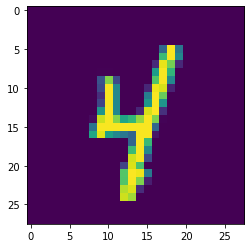

In [8]:
plt.imshow(img_train1)

In [9]:
img_train = img_train/255
img_test = img_test/255

# **Simple ANN**

In [10]:
ANN = models.Sequential([layers.Flatten(input_shape= (28,28,1)),
                         layers.Dense(300, activation = 'relu'),
                         layers.Dense(100, activation = 'relu'),
                         layers.Dense(10,activation = 'sigmoid')])

ANN.compile(optimizer = 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ANN.fit(img_train, label_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5793 - accuracy: 0.8501
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2748 - accuracy: 0.9215
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2247 - accuracy: 0.9362
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1915 - accuracy: 0.9448
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1660 - accuracy: 0.9524


In [11]:
ANN.evaluate (img_test, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1572 - accuracy: 0.9534


[0.15716597437858582, 0.9534000158309937]

In [12]:
img_pred = ANN.predict(img_test)

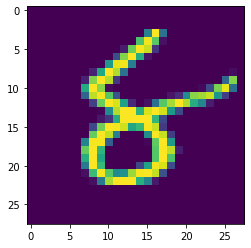

In [13]:
plt.imshow(np.squeeze(img_test[10], axis=2) )

In [14]:
print(np.argmax(img_pred[10]))

8


In [15]:
img_pred_classes = [np.argmax(index) for index in img_pred]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
digit_classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [17]:
print("classification Report: \n", classification_report(label_test, img_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.95      0.94      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.92      0.94       892
           6       0.97      0.95      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.91      0.95      0.93       974
           9       0.95      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# **CNN**

In [20]:
CNN = models.Sequential([
                         # CNN
                         layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1) ),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu' ),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu' ),
                         layers.MaxPooling2D((2,2)),

                         # Dense
                         
                         layers.Flatten(),
                         layers.Dense(64, activation = 'relu'),
                         layers.Dense(10,activation = 'softmax')])


In [21]:
CNN.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
CNN.fit(img_train, label_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1940 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0687 - accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0487 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 59s 32m

In [23]:
CNN.evaluate(img_test, label_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0435 - accuracy: 0.9893


[0.04353836178779602, 0.989300012588501]

In [24]:
img_pred_CNN = CNN.predict(img_test)

In [25]:
label_classes = [np.argmax(element) for element in img_pred]
print(label_classes[:5])

[2, 0, 4, 8, 7]


CNN prediction:
 4


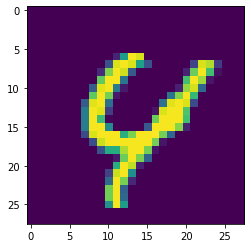

In [31]:
plt.imshow(np.squeeze(img_test[44], axis=2) )
print("CNN prediction:\n", np.argmax(img_pred[44]))